In [27]:
%load_ext autoreload
%autoreload 2
import video_processing as vp
import librain as lb
import fnames
import numpy
from roipoly import RoiPoly 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import sys
from joblib import Parallel, delayed, cpu_count
from fastdtw import fastdtw
import time
import seed
from tkinter import messagebox

from scipy import signal
import scipy.io as sio
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial.distance import correlation, euclidean #, pdist, canberra
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

import warnings

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
correlations = numpy.load('D:/DualMouse/all_roi_all_male.npy')

In [23]:
path = "D:/DualMouse/"  # location of "date" folders 
direc = lb.Data(path)

# help(direc.experiment)

EXP_1 = direc.experiment("20190823", exp_num=4)
left_blue_frame_file = direc.file(
    exp_folder=EXP_1, fname="left blue"
)
l_mouse_blue = numpy.load(left_blue_frame_file)  

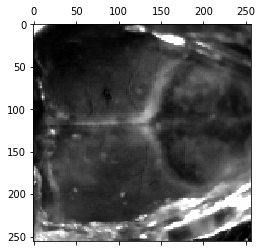

In [38]:
%matplotlib qt
bregma = seed.Bregma(l_mouse_blue)

In [37]:
%matplotlib inline
l_bregma.show()

NameError: name 'l_bregma' is not defined

In [31]:
seeds = (
    ("M1", 1.03 + 1, 1.365),
    ("FL", 0.16, 2.47),
    ("HL", -0.7, 1.85),
    ("aBC", -1.36 + 0.575, 3.35),
    ("pBC", -1.9, 3.35),
    ("AC", 0 + 1, 0.6),
    ("RS", -2.8858 + 1, 0.62043),
    ("V1", -4.2678 + 0.8, 2.5168),
    ("mPTA", -2.4962, 2.2932),
    ("lPTA", -2.4962 - 0.3, 3.35 - 0.2),
    ("Un", -1.5, 2.6),
)

scaled_seeds = seed.generate_scaled_seeds(
    seeds=seeds, bregma=bregma, ppmm=30, direction="u"
)

Direction chosen: u


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

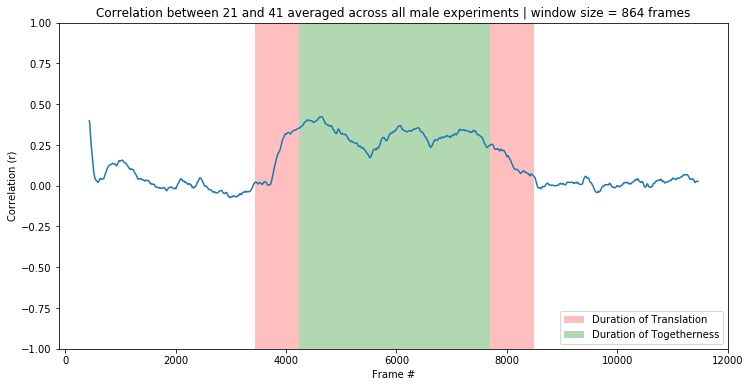

In [16]:
%matplotlib inline
together_duration = 120
translation_duration = 27.5
first_translation = 119.5

window_size = 864

TRUE_FRAMERATE = 28.815

start_first_translation = numpy.round(numpy.multiply(first_translation, TRUE_FRAMERATE))
end_first_translation = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))

start_interaction = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))
end_interaction = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))

start_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))
end_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration+translation_duration, TRUE_FRAMERATE))



mean_correlations = numpy.mean(correlations,axis=3)


plt.figure(figsize=(12, 6))

roi_r = 21
roi_c = 41

corrs = []
for i in range(int(window_size/2)):
    corrs.append(float('nan'))
for i in range(mean_correlations.shape[2]):
    corrs.append(mean_correlations[roi_r,roi_c,i])
for i in range(int(window_size/2)):
    corrs.append(float('nan'))
plt.plot(corrs)

# for x in range(22):
#     for y in range(22):
#         corrs = []
#         for i in range(int(window_size/2)):
#             corrs.append(float('nan'))
#         for i in range(mean_correlations.shape[2]):
#             corrs.append(mean_correlations[x,y+22,i])
#         for i in range(int(window_size/2)):
#             corrs.append(float('nan'))
#         plt.plot(corrs)
        
plt.axvspan(
    start_first_translation,
    end_first_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)
plt.axvspan(
    start_second_translation,
    end_second_translation,
    facecolor="r",
    alpha=0.25,
    #label="Duration of Translation",
)
plt.axvspan(
    start_interaction,
    end_interaction,
    facecolor="g",
    alpha=0.3,
    label="Duration of Togetherness",
)
plt.ylim((-1,1))
plt.xlabel("Frame #")
plt.ylabel("Correlation (r)")
plt.title("Correlation between {} and {} averaged across all male experiments | window size = 864 frames".format(roi_r,roi_c))
plt.legend(loc=4, prop={'size': 10})
#plt.savefig("D:/DualMouse/Correlation_ws864_males_all_roi.png",dpi = 300, transparent=True, format = 'png')